<a href="https://colab.research.google.com/github/binuvp/ITWORKSHOP/blob/main/SESSION2_PRACTICAL1_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementing a Feedforward Neural Network for CIFAR-10 Classification in Keras

#### Understanding the Problem
We're tasked with creating a feedforward neural network with three hidden layers to classify images from the CIFAR-10 dataset. CIFAR-10 contains 60,000 color images in 10 classes, with 6,000 images per class.

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

import numpy as np

#### Loading and Preprocessing the Data
- We load the CIFAR-10 dataset into training and testing sets.
- Pixel values are normalized to a range of 0-1 for better performance.
- Class labels are converted to one-hot encoded vectors for categorical cross-entropy loss.

In [ ]:
# Loading and Preprocessing the Data

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert  class vectors to binary class matrices
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


#### Building the Feedforward Neural Network
- We create a Sequential model.
- The input layer flattens the 32x32x3 image into a 1D vector.
- Three hidden layers with 512, 256, and 128 neurons are added, using ReLU activation.
- Dropout layers are added to prevent overfitting.
- The output layer has 10 neurons (for 10 classes) with softmax activation for probability distribution.
- The model is compiled with categorical cross-entropy loss, Adam optimizer, and accuracy metric.

In [ ]:
# Create the model
model = Sequential()

model.add(Flatten(input_shape=(32, 32, 3)))

# Hidden layers
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))


# Output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### Training the Model
- The model is trained for 10 epochs with a batch size of 32.
- Validation data is used to monitor performance during training.

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.2712 - loss: 2.0010 - val_accuracy: 0.3851 - val_loss: 1.6951
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3855 - loss: 1.7042 - val_accuracy: 0.4128 - val_loss: 1.6349
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4206 - loss: 1.6063 - val_accuracy: 0.4540 - val_loss: 1.5279
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4480 - loss: 1.5405 - val_accuracy: 0.4390 - val_loss: 1.5551
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4579 - loss: 1.5010 - val_accuracy: 0.4556 - val_loss: 1.5228
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4731 - loss: 1.4680 - val_accuracy: 0.4794 - val_loss: 1.4661
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4803 - loss: 1.4533 - val_accuracy: 0.4772 - val_loss: 1.4723
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4920 - loss: 1.4113 

#### Evaluating the Model
- The model is evaluated on the test set.
- Test accuracy is printed.

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4965 - loss: 1.4410
Test accuracy: 0.49149999022483826


#### Creating a Confusion Matrix in Keras

Understanding the Confusion Matrix
    A confusion matrix is a performance evaluation metric that provides an overview of the accuracy of a classification model. It's a table with actual values in rows and predicted values in columns.
- We predict the probabilities for each class using the trained model.
- We convert the probabilities to class labels using argmax.


In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
# Make predictions on the test set
y_pred = model.predict(x_test)
# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


- We calculate the confusion matrix using sklearn.metrics.confusion_matrix.
- We visualize the confusion matrix using seaborn's heatmap.

Understanding the Confusion Matrix
- Each row represents the actual class.
- Each column represents the predicted class.
- The diagonal elements represent correctly classified instances.
- Off-diagonal elements represent misclassified instances.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


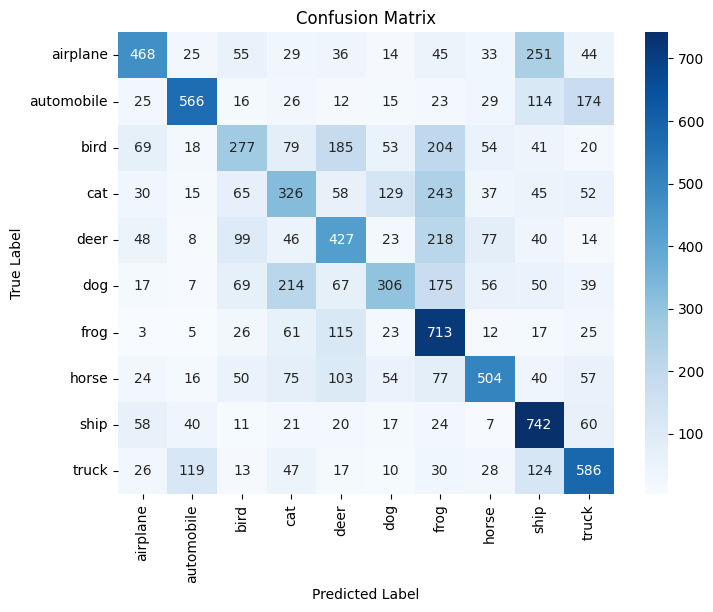

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
# Assuming 'model', 'x_test', and 'y_test' are defined in the kernel from previous executions
y_pred = model.predict(x_test)
# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')

plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Plot Learning Curves

Training Loss vs. Validation Loss

- X-axis: Represents the number of epochs.
- Y-axis: Represents the loss value.
- Training loss: Shows how well the model fits the training data. It generally decreases as the model learns.
- Validation loss: Shows how well the model generalizes to unseen data. It's calculated on a validation set.
    
Ideal scenario:

- Both training and validation loss decrease steadily.
- The gap between the two curves is small.

Overfitting:

- Training loss continues to decrease, but validation loss starts to increase or plateau.
- This indicates the model is learning the training data too well and is not generalizing well to new data.

Underfitting:

- Both training and validation loss are high and plateau early.
- This indicates the model is not complex enough to capture the underlying patterns in the data.

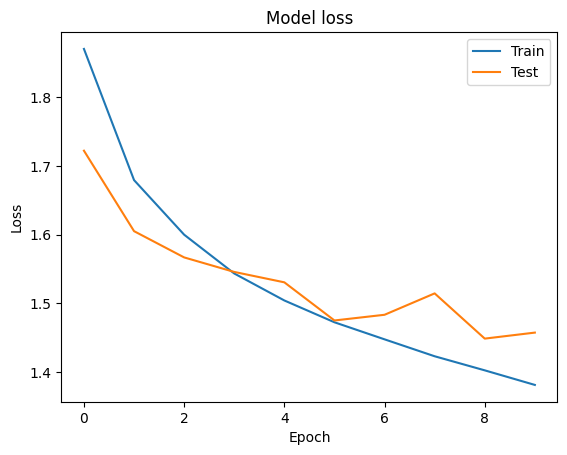

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


Training Accuracy vs. Validation Accuracy

- X-axis: Represents the number of epochs.
- Y-axis: Represents the accuracy value.
- Training accuracy: Shows how accurately the model predicts on the training data.
- Validation accuracy: Shows how accurately the model predicts on unseen data.

Ideal scenario:

- Both training and validation accuracy increase steadily.
- The gap between the two curves is small.

Overfitting:

- Training accuracy continues to increase, but validation accuracy plateaus or decreases.
- This indicates the model is memorizing the training data instead of learning general patterns.

Underfitting:

- Both training and validation accuracy are low and plateau early.
- This indicates the model is not complex enough to learn the underlying patterns in the data.

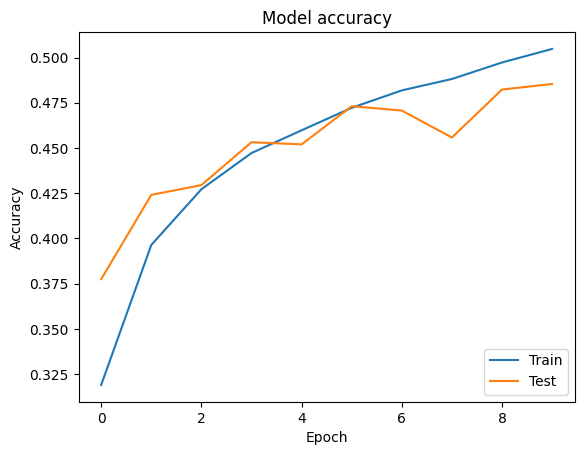

In [ ]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')

plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()
